In [1]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from cycler import cycler


In [2]:
## Load dataframe
figuresDir='/Users/nathanvaughn/Google Drive/Research/GreensIterationPaper/figures/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/OxygenData/gradientFree/'
file='runComparison.csv'
df = pd.read_csv(resultsDir+file, header=0)

# Oxygen Atom DFT-FE 
TotalEnergy = -7.4469337501098821e+01
BandEnergy = -4.0613397710076626e+01 
HartreeEnergy = 36.32506036
ExchangeEnergy = 0.0
CorrelationEnergy = 0.0
KineticEnergy = 0.0

## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [16]:
## Plotting functions
def gradientFree(df,A,B,C,save=False):
    
    df=df.sort_values(by=['gradientFree'])
    
#     default_cycler = cycler(color=['k']) * (cycler(marker=['o', '^','s'])) 
    default_cycler = cycler(marker=['o', '^','s']) * cycler(linestyle=['--']) + cycler('color', 'bgr')
    # cycler('color', 'bgrcmyk')
    print(default_cycler)

    plt.rc('lines', linewidth=1)
    plt.rc('axes', prop_cycle=default_cycler)

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    grouped = df.groupby(C)
#     print(grouped)
#     grouped.sort_values(C, ascending=False)
    for method in ['Laplacian','Gradient','Gradient-Free']:
        for name,group in grouped:
            if name=='True':
                name='Gradient-Free'
            if name=='False':
                name='Gradient'
            if name==method:
                group.plot(x=B, y=A,markerSize=6, fillstyle='none', ax=ax, loglog=True,label='%s'%(name))
    plt.legend() 
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.xlabel('Mesh Size')
#     plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Energy Error (Hartree)') 
    plt.grid()
    
#     plt.xlim([0.25, 1.0])
#     plt.ylim([3e-10,1e-2])
#     plt.grid()
    
#     df.plot(x='divideParameter3',y='batchSize',logx=True,style='o')
    if save != False:
        saveID = save
        plt.savefig(figuresDir+saveID+'.png', bbox_inches='tight',format='png', dpi=500)
    plt.show()

In [17]:
df;

((cycler('marker', ['o', '^', 's']) * cycler('linestyle', ['--'])) + cycler('color', ['b', 'g', 'r']))


<IPython.core.display.Javascript object>


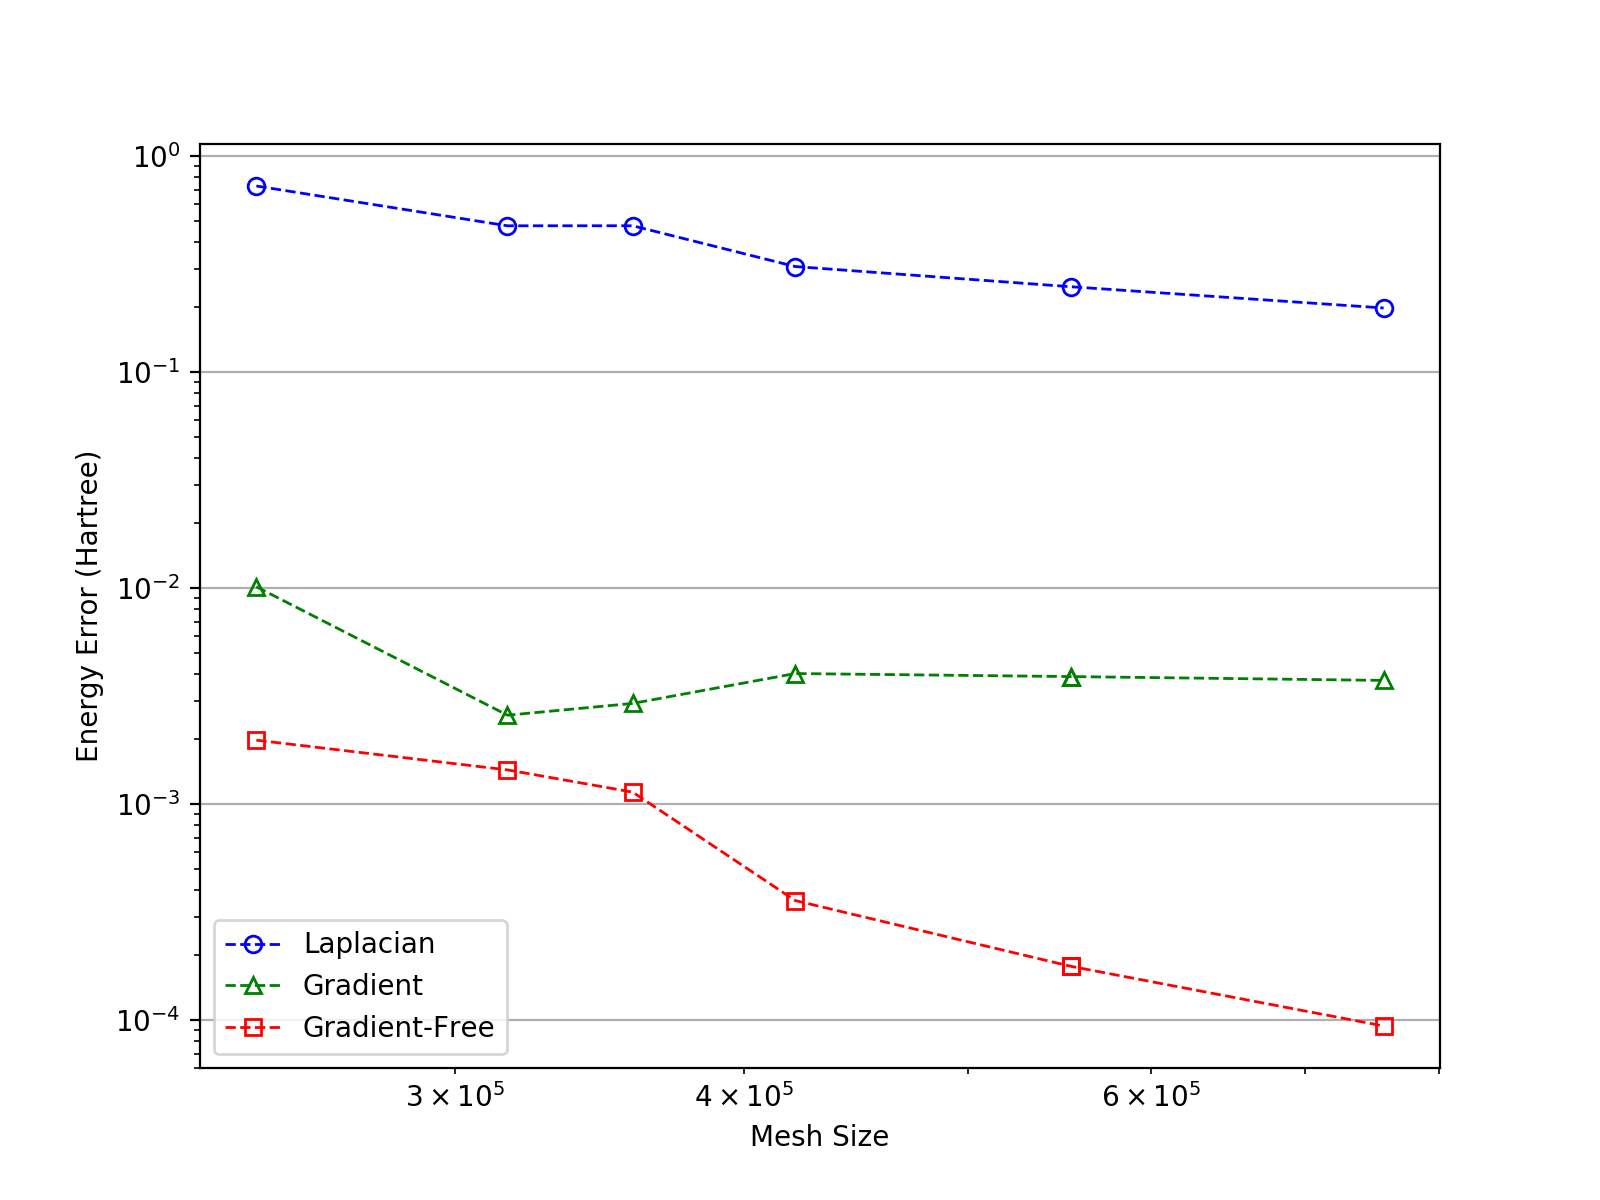

In [18]:
# print(df)
# gradientFree(df,'absTotalEnergyError','divideParameter3','gradientFree')
# gradientFree(df,'absTotalEnergyError','numberOfPoints','gradientFree')
gradientFree(df,'absBandEnergyError','numberOfPoints','gradientFree',save='oxygen_gradient_free')
# gradientFree(df,'absHartreeEnergyError','numberOfPoints','gradientFree')

In [6]:
for i in df.loc[df['gradientFree']=='Laplacian'].index:
    print(i)
    print(df.iloc[i],'\n')
    df=df.drop(df.iloc[i])
df

14
domainSize                                                                  20
minDepth                                                                     3
maxDepth                                                                    14
additionalDepthAtAtoms                                                       0
depthAtAtoms                                                                14
order                                                                        5
numberOfCells                                                             1968
numberOfPoints                                                          246000
gradientFree                                                         Laplacian
divideCriterion                                         ParentChildrenIntegral
divideParameter1                                                             0
divideParameter2                                                             0
divideParameter3                                 

KeyError: "[20 1968 246000 'Laplacian' 'ParentChildrenIntegral' 3e-06 -0.5 1e-06\n '[-18.41575727  -0.85396736  -0.33613486  -0.33613485  -0.33613485]'\n -39.8839886761 73.9008653391 -7.174305726489999 -0.5436529290150001\n 36.138822066799996 -73.5687283556 8000 8000 3556.9975476264954\n 1.1935410499572754 569 0.7294090339766228 7.174305726489999\n 0.18623829320000596 0.5436529290150001 0.9006091454988194 73.9008653391\n 0.7294090339766228 -7.174305726489999 -0.18623829320000596\n -0.5436529290150001 0.9006091454988194 73.9008653391] not found in axis"